In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost
import shap

In [3]:
# Load the Titanic dataset
titanic = pd.read_csv('https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv')

In [4]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
# Prepare the data
titanic = titanic.drop(['Name', 'Fare', 'Age'], axis=1)
titanic = pd.get_dummies(titanic, drop_first=True)
titanic = titanic.dropna()

X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Train a xgboost classifier
model = xgboost.XGBClassifier().fit(X_train, y_train)

# Evaluate the model
print("Accuracy:", model.score(X_test, y_test))

Accuracy: 0.7247191011235955


In [25]:
# Explain a single prediction
data_for_prediction = X_test
explainer = shap.Explainer(model, X_test)
shap_values = explainer(data_for_prediction)

Example of a Male Passenger


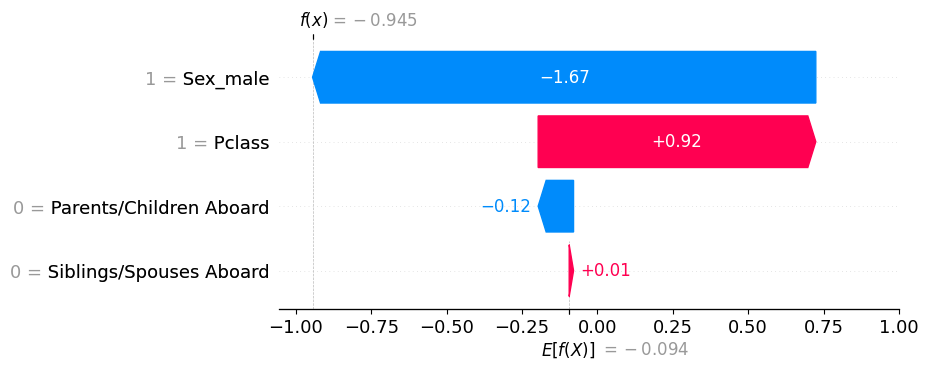

In [41]:
print("Example of a Male Passenger")
shap.plots.waterfall(shap_values[0])

Example of a Female Passenger


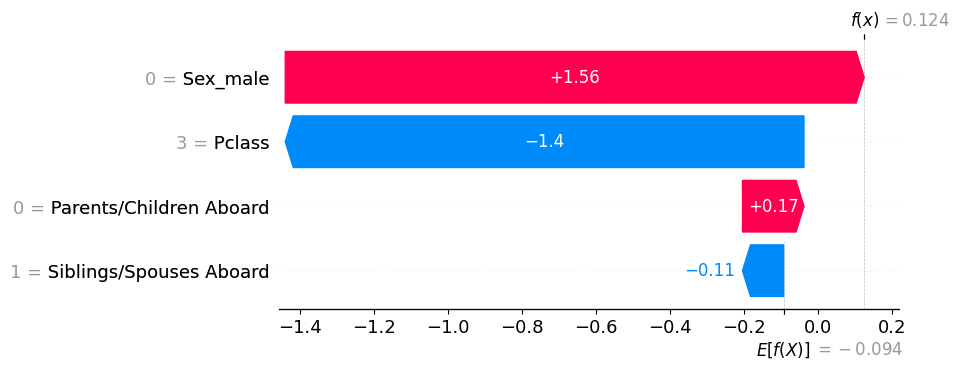

In [42]:
print("Example of a Female Passenger")
shap.plots.waterfall(shap_values[5])